Nama : Gervasius Russell 

NIM : 2702257450


# **LSTM FOR AIR QUALITY**

## **1. Exploratory Data Analysis**

### 1.1 Loading data and Understanding data overview

In [1]:
import pandas as pd
df = pd.read_csv("AP003.csv")
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


### 1.1.1 Melihat plot missing value
 

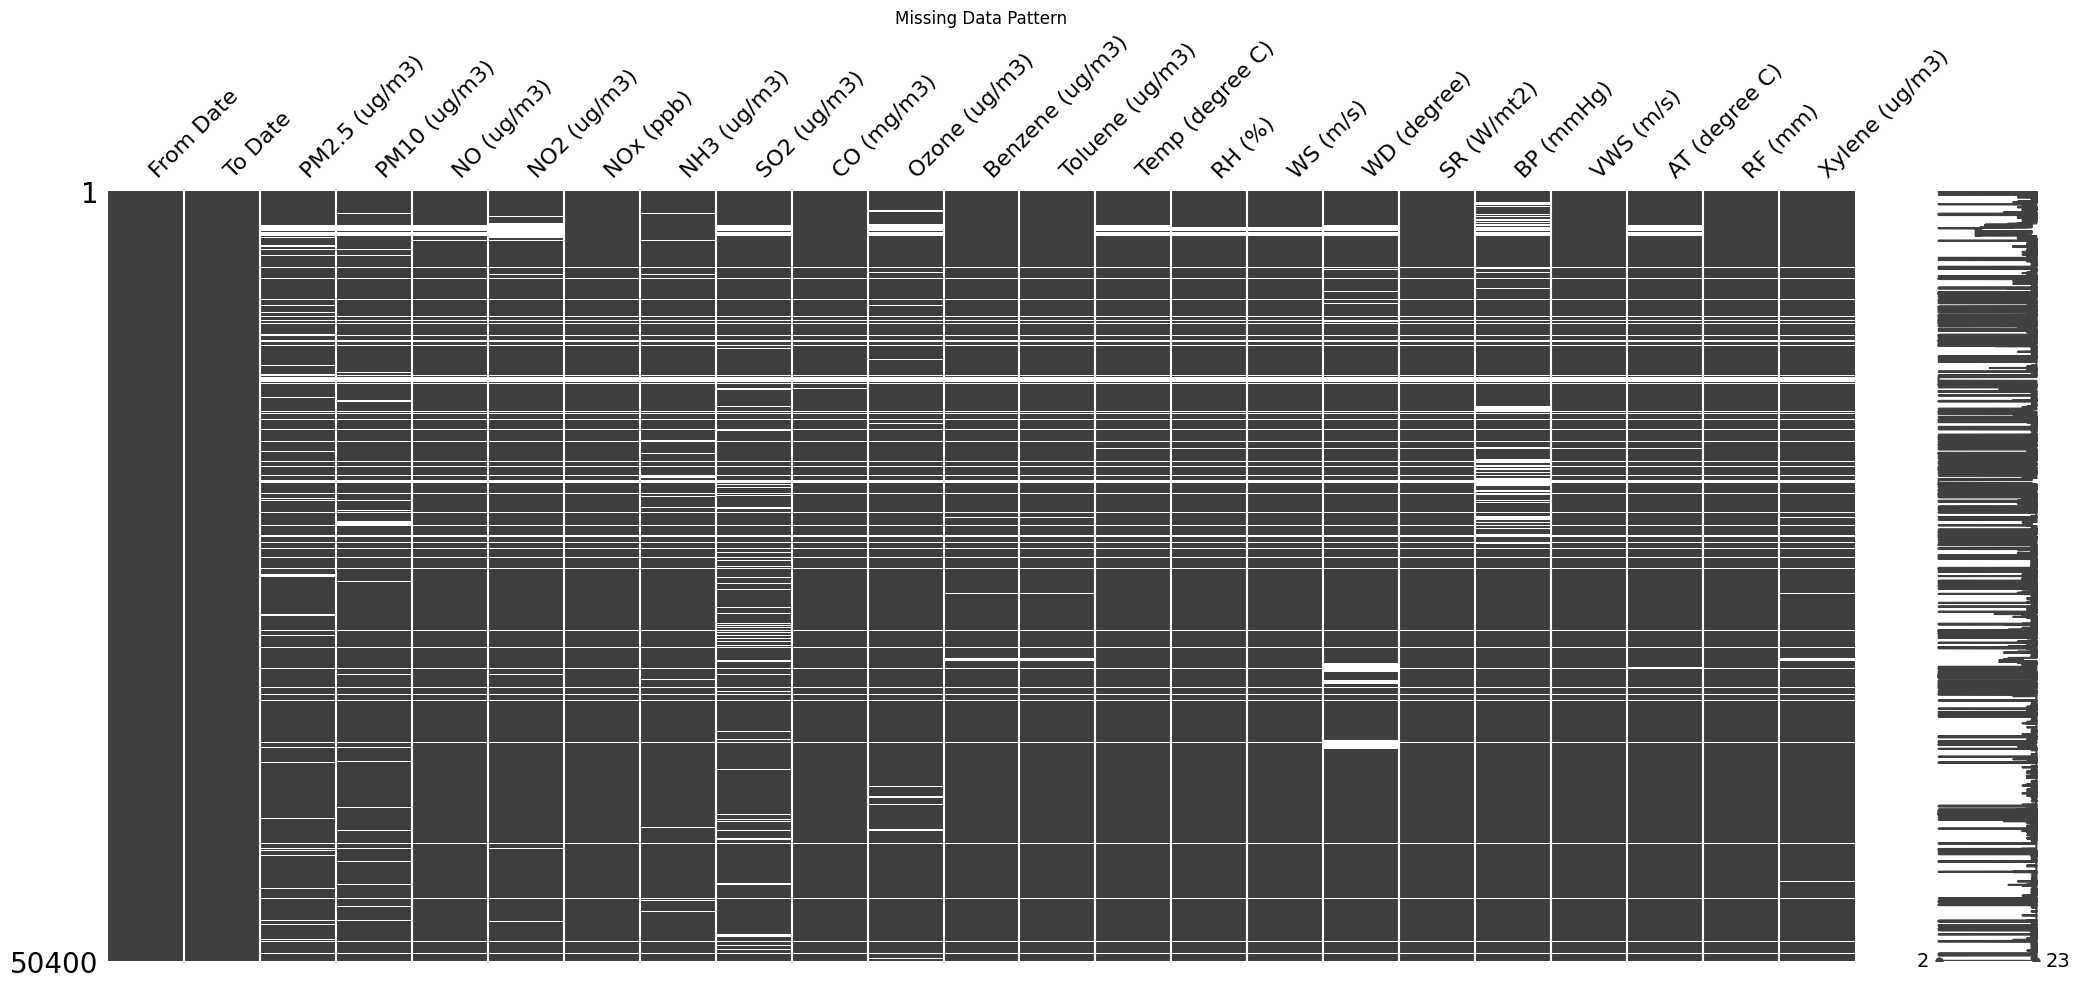

In [2]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.title("Missing Data Pattern")
plt.show()

dari plot ini kita bisa melihat adanya row yang memiliki null value di semua columnnya. ini sangat krusial untuk LSTM dan approach null value imputation technique

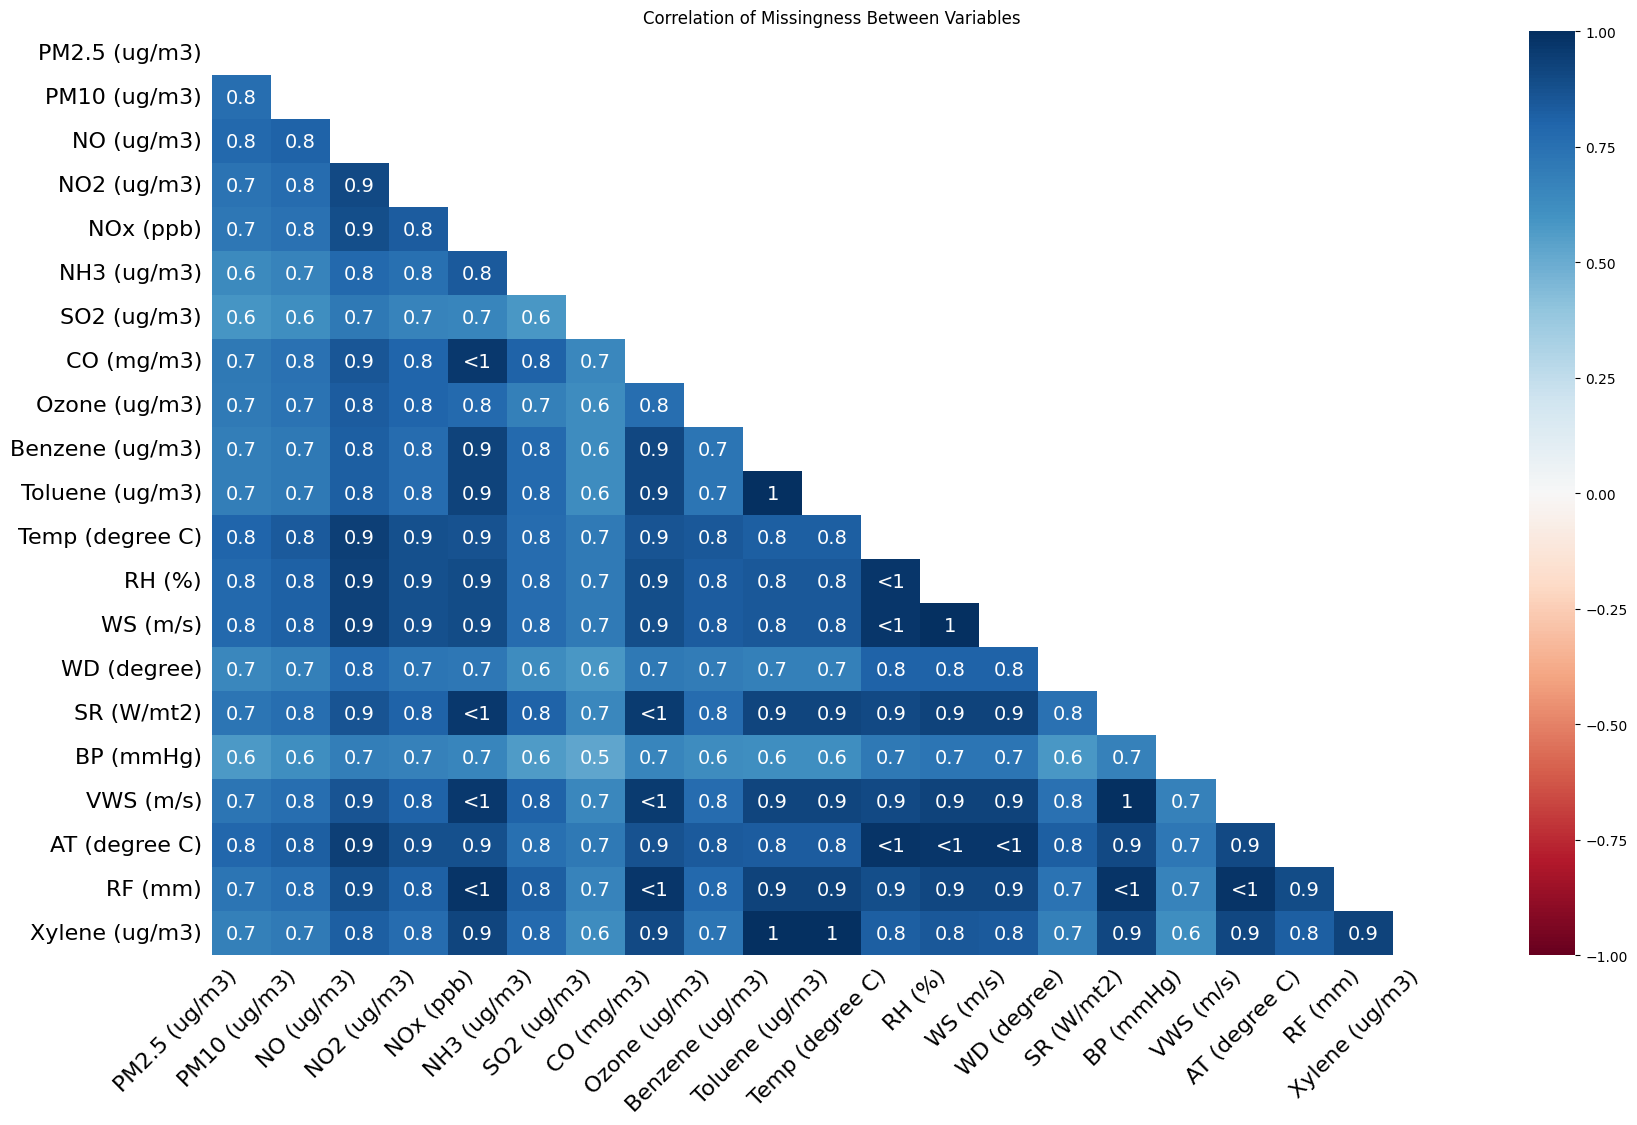

In [3]:
msno.heatmap(df)
plt.title("Correlation of Missingness Between Variables")
plt.show()

Kita bisa melihat bahwa from date dan to date hanya beda satu jam.

Gunakan "To Date" karena:

Mewakili waktu sebenarnya dari data,

Lebih konsisten sebagai indeks waktu untuk LSTM,

"From Date" hanya pendamping yang tidak dibutuhkan setelahnya.

### 1.1.2 Menjadikan To date sebagai index


In [4]:
import pandas as pd
df = pd.read_csv("AP003.csv",
                 parse_dates=["To Date", "From Date"],
                 index_col=["To Date"],
                 date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M:%S"))
df = df.drop(columns=["From Date"])
df.head()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
To Date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


### 1.1.3 Melihat pola target var

<Axes: title={'center': 'Air Temperature Over Time'}, xlabel='To Date'>

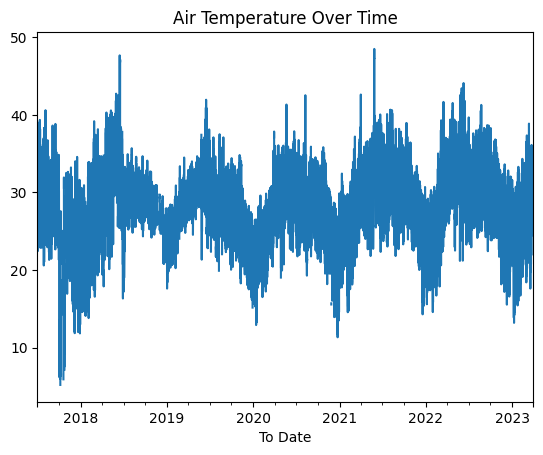

In [5]:
df['AT (degree C)'].plot(title='Air Temperature Over Time')  # Lihat pola naik/turun

- **Pola Musiman (Seasonal Pattern)**: Terdapat fluktuasi periodik yang konsisten, mengindikasikan adanya **siklus tahunan atau musiman**. Ini wajar karena temperatur udara dipengaruhi musim.
- **Fluktuasi Harian dan Bulanan**: Tampak adanya gelombang naik-turun dalam skala lebih kecil, menunjukkan fluktuasi harian atau mingguan yang alami (siang vs malam, hujan, dsb).
- **Outlier Suhu**: Beberapa lonjakan suhu ke atas (hampir menyentuh 50°C) bisa jadi indikasi **anomaly sensor atau data ekstrem**.

- **Konsistensi Pengukuran**: Secara umum, data suhu ini **stabil dan berkelanjutan**, cocok digunakan untuk modeling time series seperti LSTM.

<Axes: title={'center': 'Rata-rata Suhu per Jam'}, xlabel='To Date'>

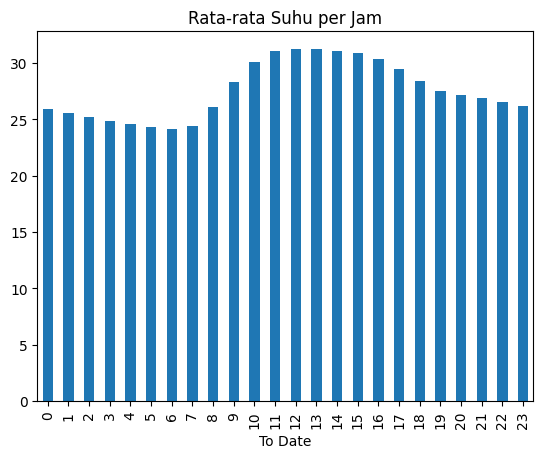

In [6]:
# Contoh: Cek pola harian suhu (AT)
df['AT (degree C)'].groupby(df.index.hour).mean().plot(kind='bar', title='Rata-rata Suhu per Jam')

- Kita bisa melihat adanya kenaikan suhu mulai jam 8 pagi dan menurun mulai jam 15 siang

In [7]:
def data_overview(df):
    print("=== DataFrame Info ===")
    df.info()
    
    print("\n=== Shape ===")
    print(df.shape)
    
    print("\n=== Columns ===")
    print(df.columns.tolist())

    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    print("\n=== Number of Duplicate Rows ===")
    print(df.duplicated().sum())

    print("\n=== Numerical Summary (describe) ===")
    print(df.describe())


data_overview(df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2017-07-01 01:00:00 to 2023-04-01 00:00:00
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PM2.5 (ug/m3)    44691 non-null  float64
 1   PM10 (ug/m3)     45018 non-null  float64
 2   NO (ug/m3)       46252 non-null  float64
 3   NO2 (ug/m3)      45705 non-null  float64
 4   NOx (ppb)        47040 non-null  float64
 5   NH3 (ug/m3)      45756 non-null  float64
 6   SO2 (ug/m3)      43604 non-null  float64
 7   CO (mg/m3)       46993 non-null  float64
 8   Ozone (ug/m3)    45309 non-null  float64
 9   Benzene (ug/m3)  46678 non-null  float64
 10  Toluene (ug/m3)  46678 non-null  float64
 11  Temp (degree C)  46335 non-null  float64
 12  RH (%)           46520 non-null  float64
 13  WS (m/s)         46522 non-null  float64
 14  WD (degree)      44710 non-null  float64
 15  SR (W/mt2)       47045 non-null  float64
 16  

### 1.2 Mengimputasi NULL dengan Interpolasi Time Series

Disini saya akan menggunakan interpolasi karena:

- Mempertahankan tren alami waktu.

- Menghindari distorsi distribusi yang terjadi jika menggunakan mean/median.

- Tidak mengacaukan pola temporal penting untuk LSTM.

In [8]:
# Copy untuk diproses
df_interp = df.copy()

# Interpolasi dan imputasi
df_interp = df_interp.interpolate(method='time')

print(df_interp.isnull().sum().sum())  # Cek jumlah NaN setelah interpolasi

# Imputasi tambahan jika masih ada NaN di ujung-ujung
df_interp = df_interp.fillna(method='bfill').fillna(method='ffill')

# Cek ulang
print(df_interp.isnull().sum().sum())  # Harus 0


4
0


- karena interpolasi tidak bisa mengimputasi semua nilai null akan saya gunakan bfil/ffil untuk mengisi sisanya

### 1.2.1 Melihat distribusi sebelum dan sesudah diimputasi


=== Numeric Features ===
['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']

=== COMPARISON for PM2.5 (ug/m3) ===


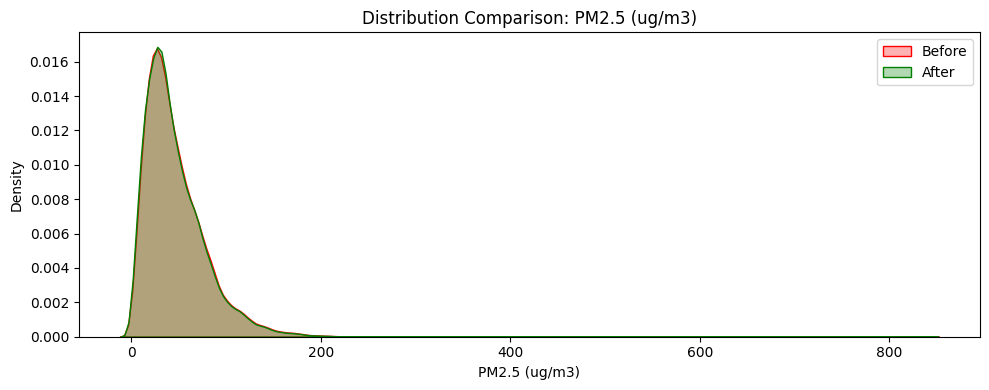


=== COMPARISON for PM10 (ug/m3) ===


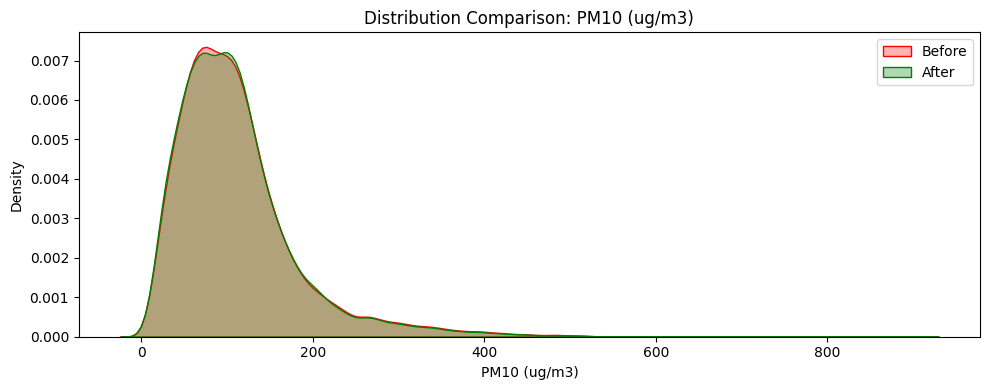


=== COMPARISON for NO (ug/m3) ===


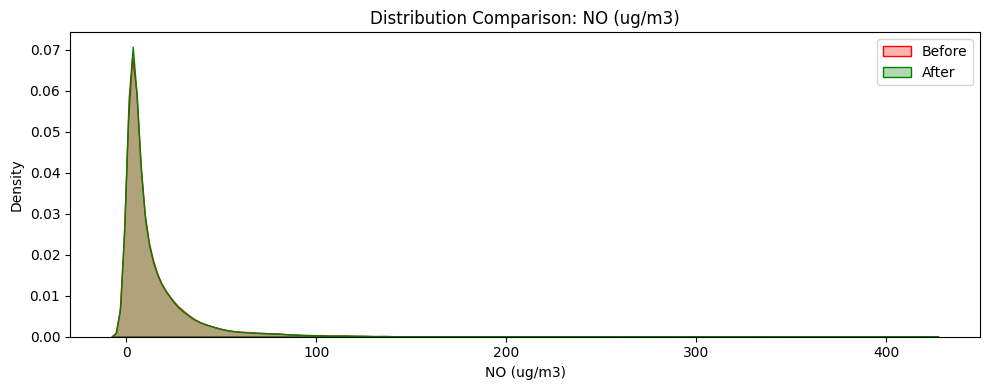


=== COMPARISON for NO2 (ug/m3) ===


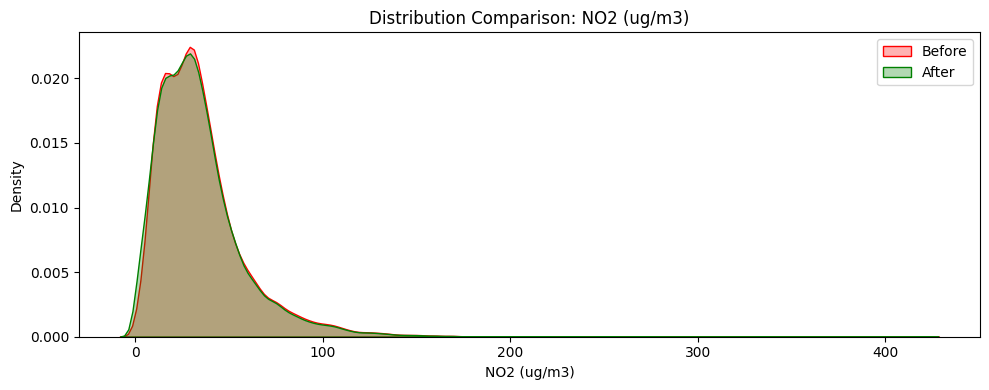


=== COMPARISON for NOx (ppb) ===


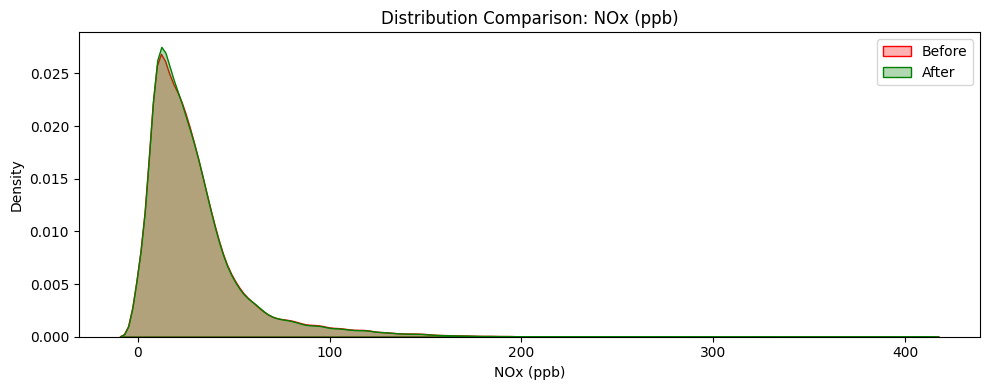


=== COMPARISON for NH3 (ug/m3) ===


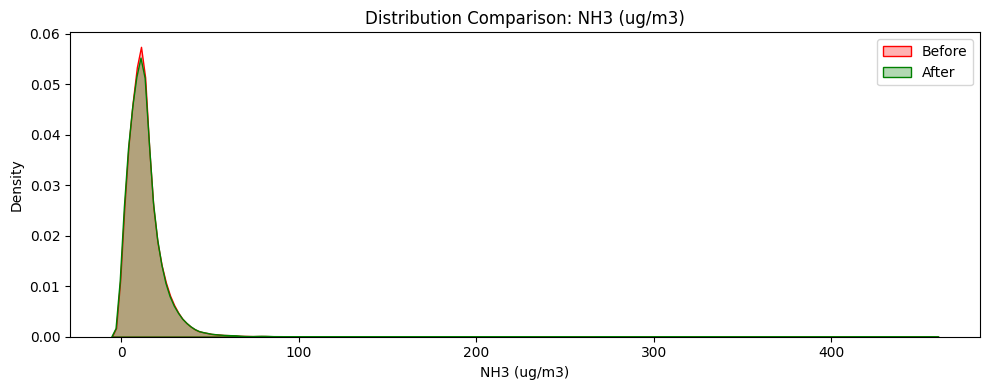


=== COMPARISON for SO2 (ug/m3) ===


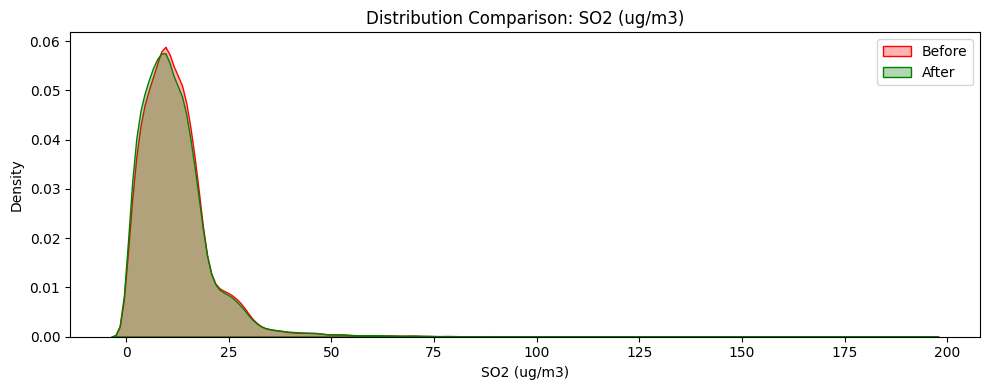


=== COMPARISON for CO (mg/m3) ===


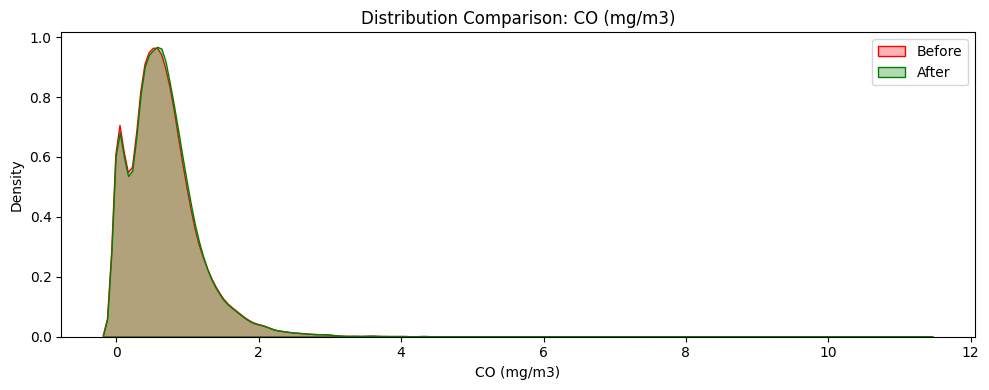


=== COMPARISON for Ozone (ug/m3) ===


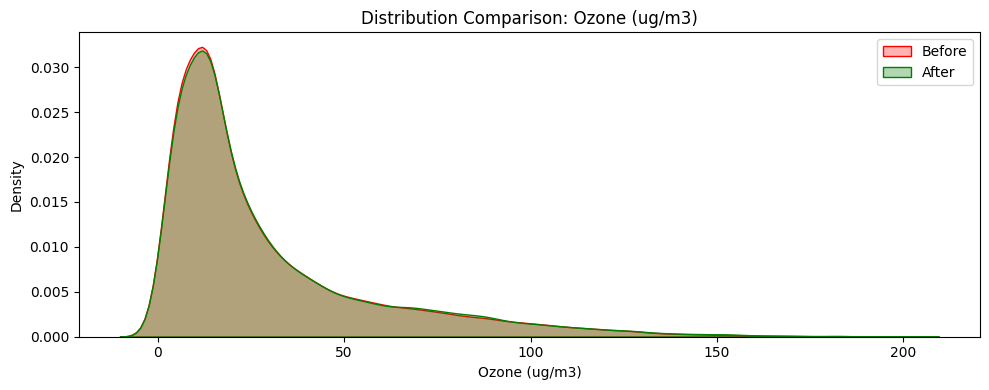


=== COMPARISON for Benzene (ug/m3) ===


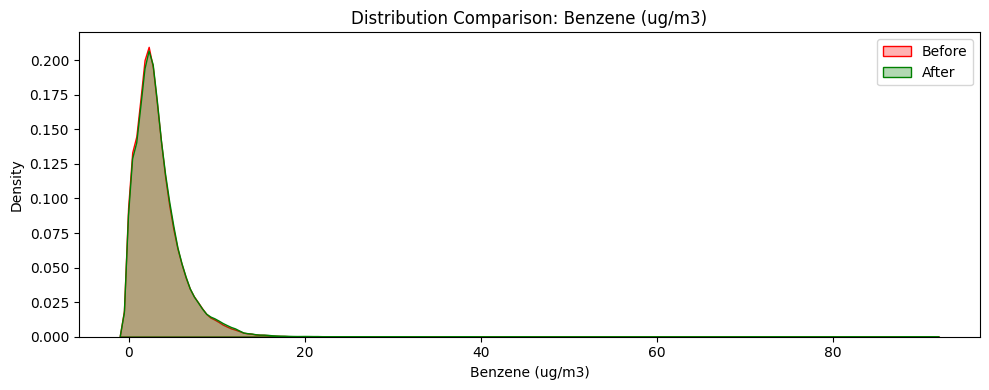


=== COMPARISON for Toluene (ug/m3) ===


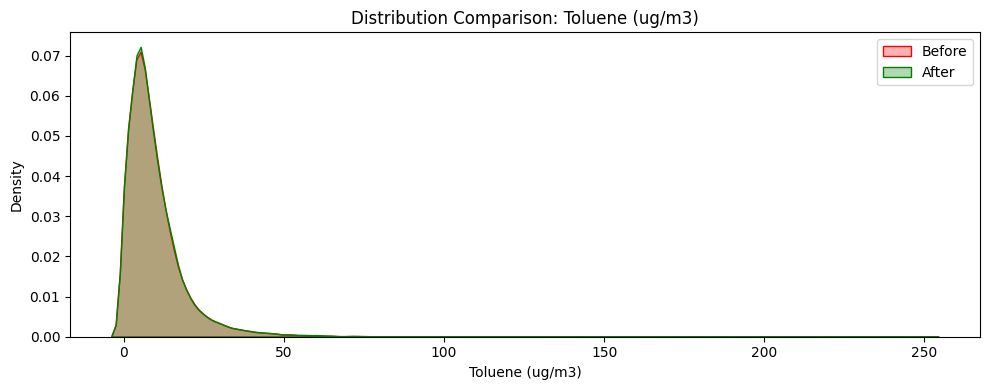


=== COMPARISON for Temp (degree C) ===


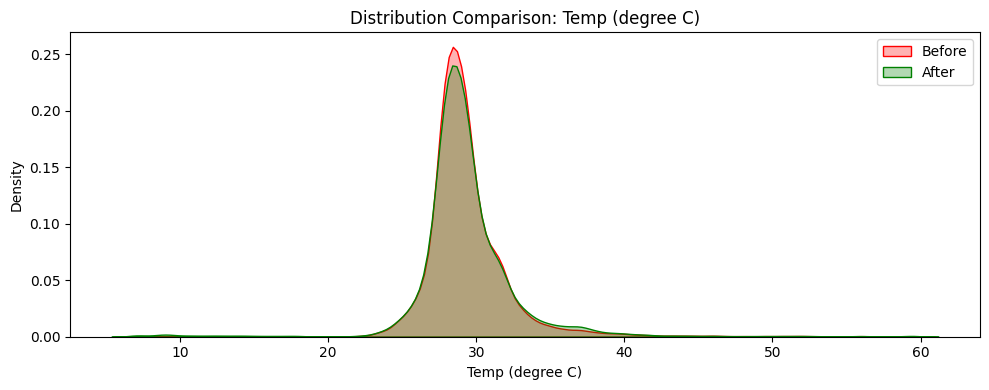


=== COMPARISON for RH (%) ===


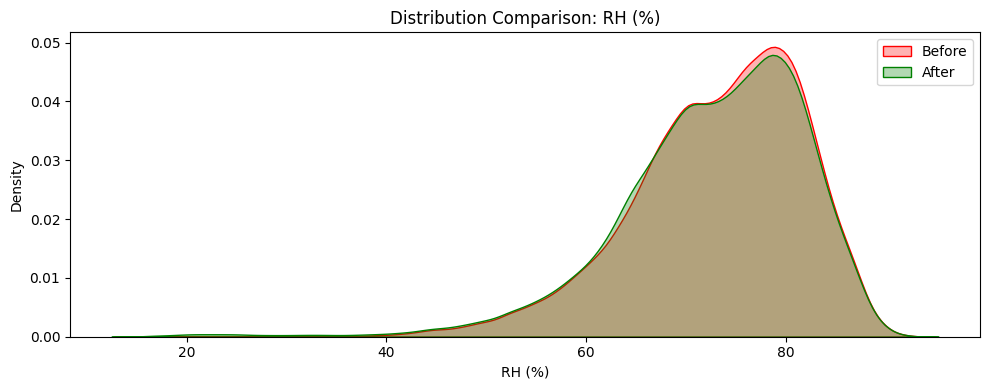


=== COMPARISON for WS (m/s) ===


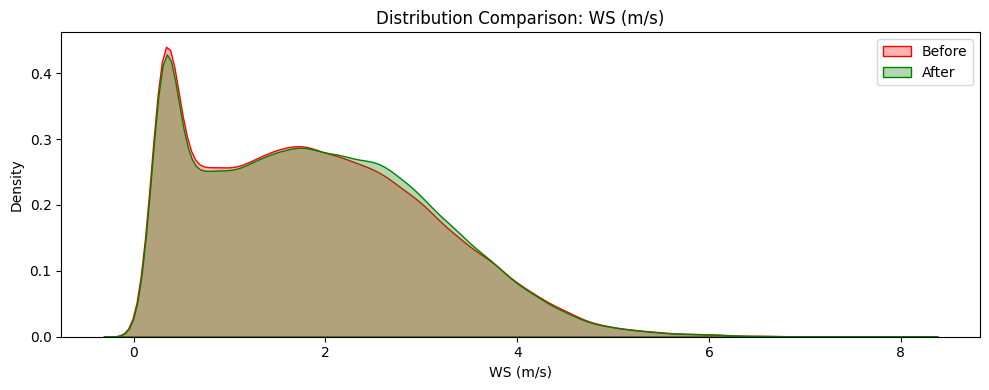


=== COMPARISON for WD (degree) ===


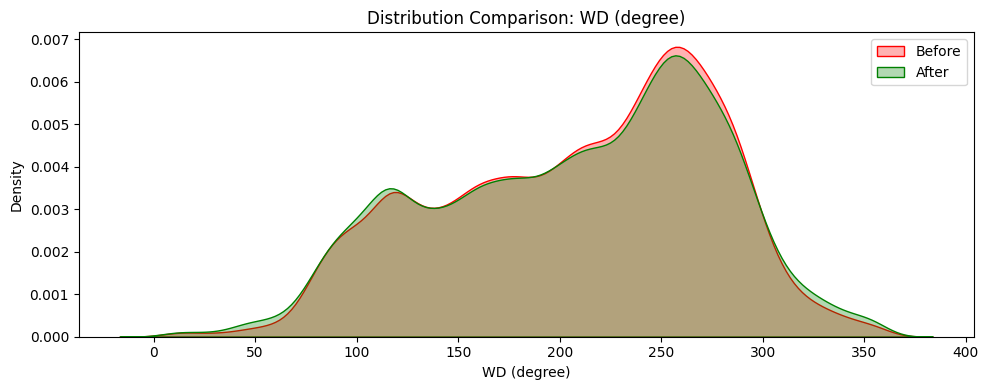


=== COMPARISON for SR (W/mt2) ===


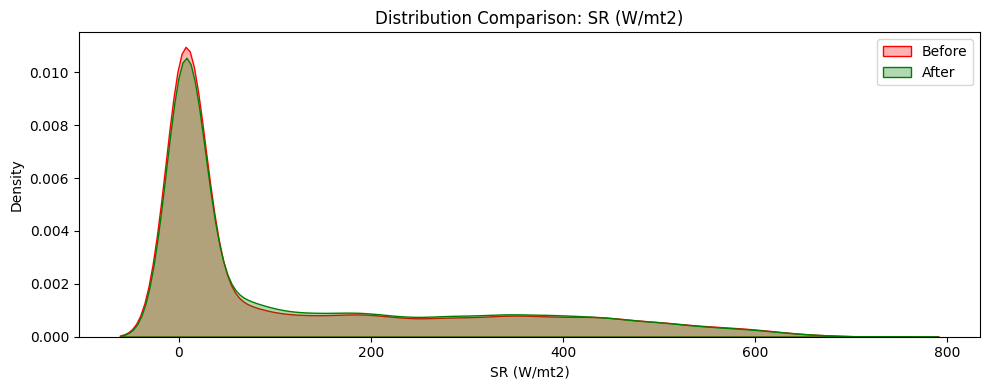


=== COMPARISON for BP (mmHg) ===


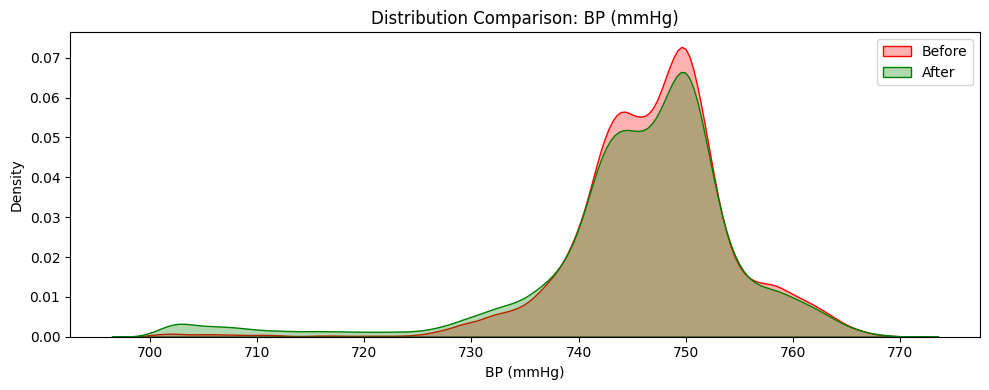


=== COMPARISON for VWS (m/s) ===


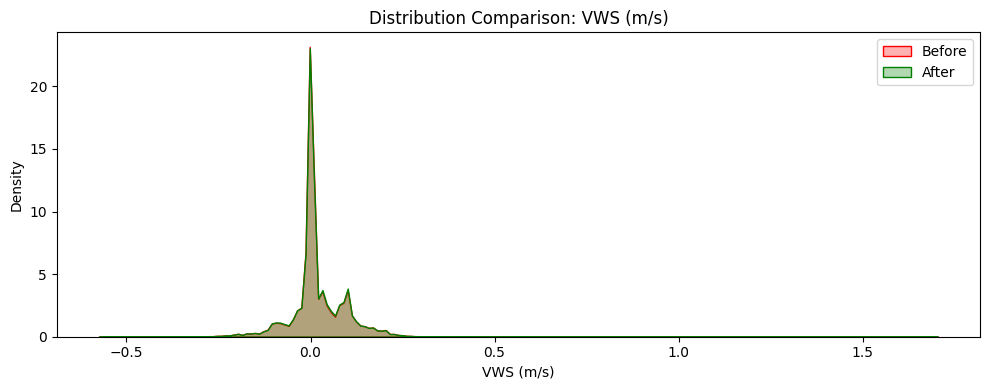


=== COMPARISON for AT (degree C) ===


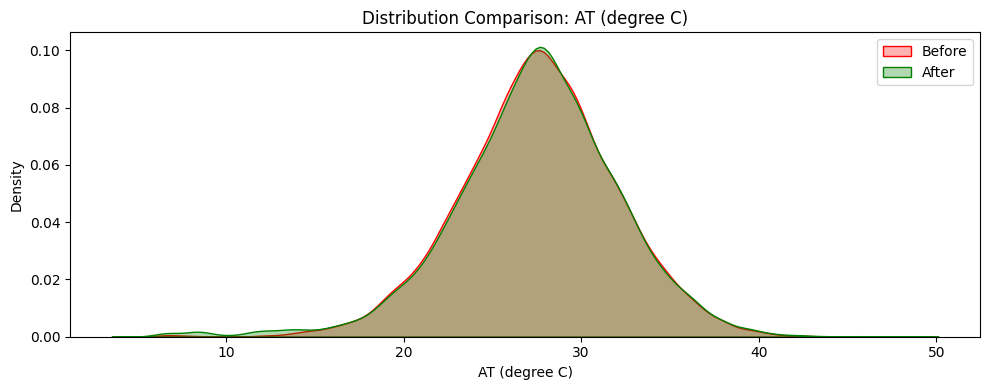


=== COMPARISON for RF (mm) ===


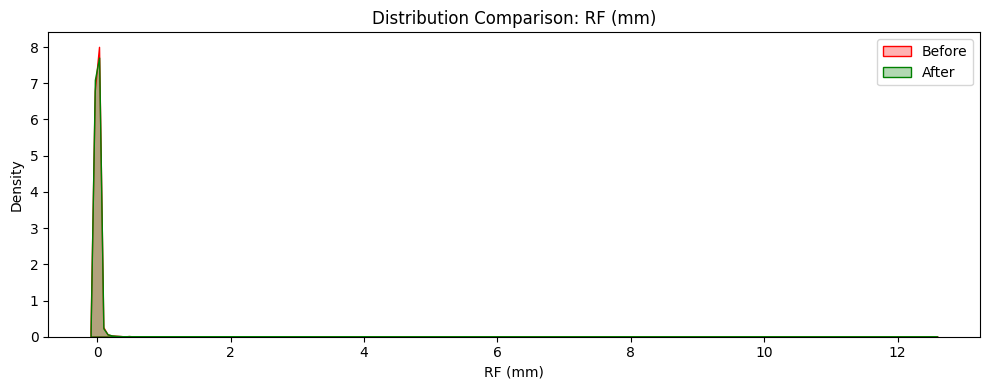


=== COMPARISON for Xylene (ug/m3) ===


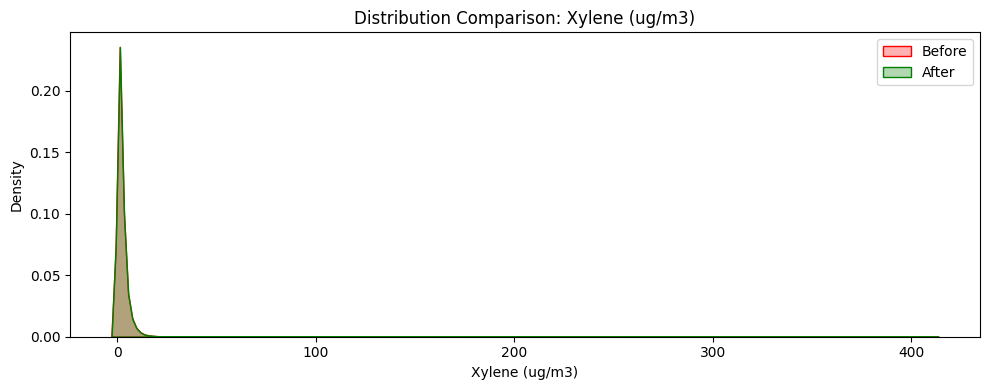

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def comparison_feature(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print("\n=== Numeric Features ===")
    print(numeric_cols)
    
    for col in numeric_cols:
        print(f"\n=== COMPARISON for {col} ===")
        
        
        plt.figure(figsize=(10, 4))
        sns.kdeplot(df[col], label='Before', color='red', fill=True, alpha=0.3)
        sns.kdeplot(df_interp[col], label='After', color='green', fill=True, alpha=0.3)
        plt.title(f'Distribution Comparison: {col}')
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()


# Analyze numeric features
comparison_feature(df)

Data yang hilang diisi dengan nilai yang sangat wajar secara statistik dan temporal.

Tidak terjadi overfitting distribusi atau perubahan pola nilai penting, yang biasanya bisa mengganggu model LSTM.

Validasi distribusi = aman

### 1.3 Normalisasi Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_interp)
scaled_df = pd.DataFrame(scaled_data, index=df_interp.index, columns=df_interp.columns)
scaled_df.tail()

# Dapatkan urutan index kolom target
target_col = 'AT (degree C)'
target_index = list(df.columns).index(target_col)  # pastikan urutan sama saat fit

- LSTM sensitif terhadap skala fitur.

- Contoh: fitur seperti suhu (0–50), kecepatan angin (0–8), CO (0–11), dan RH (%) (0–100) memiliki rentang berbeda.

- Normalisasi mempercepat konvergensi dan menghindari dominasi fitur tertentu.

## **2. Data Preprocessing & Data Splitting**

### 2.1 Data Splitting 80/10/10

In [11]:
# Ambil data sebagai numpy array
data = scaled_df.values
target_col = 'AT (degree C)'
target_index = scaled_df.columns.get_loc(target_col)

# Split sebelum di-windowing
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))

data_train = data[:train_size]
data_val   = data[train_size:train_size+val_size]
data_test  = data[train_size+val_size:]


### 2.2 Sequence Generation

### 2.2.1 Buat Fungsi Sliding Window Input–Output

In [12]:
import numpy as np

def create_sequences(data, n_steps, target_index):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])       # 5 jam input sebelumnya
        y.append(data[i, target_index])   # 1 jam ke depan (AT)
    return np.array(X), np.array(y)

n_steps = 5  # window size
X_train, y_train = create_sequences(data_train, n_steps, target_index)
X_val, y_val     = create_sequences(data_val, n_steps, target_index)
X_test, y_test   = create_sequences(data_test, n_steps, target_index)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (40315, 5, 21)
X_val shape: (5035, 5, 21)
X_test shape: (5035, 5, 21)


## **3. LSTM Model**

### 3.1 Importing Library

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 3.2 Baseline LSTM Model

### 3.2.1 Arsitektur Model

In [14]:
model = Sequential([
    LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='linear')  # regresi linear
])
model.compile(optimizer='adam', loss='mse')


1. LSTM dengan hidden size 10 → LSTM(10, ...)

2. Single layer regressor → hanya 1 lapisan Dense(1)

3. Aktivasi linear → activation='linear'

### 3.2.2 Training Model

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)


Epoch 1/30
630/630 [==============================] - 9s 5ms/step - loss: 0.0148 - val_loss: 0.0056
Epoch 2/30
630/630 [==============================] - 3s 5ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 3/30
630/630 [==============================] - 3s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/30
630/630 [==============================] - 3s 5ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/30
630/630 [==============================] - 3s 5ms/step - loss: 8.9877e-04 - val_loss: 8.8156e-04
Epoch 6/30
630/630 [==============================] - 3s 6ms/step - loss: 7.7221e-04 - val_loss: 7.6089e-04
Epoch 7/30
630/630 [==============================] - 4s 6ms/step - loss: 6.8007e-04 - val_loss: 7.1289e-04
Epoch 8/30
630/630 [==============================] - 3s 6ms/step - loss: 5.9765e-04 - val_loss: 5.9742e-04
Epoch 9/30
630/630 [==============================] - 4s 6ms/step - loss: 5.3661e-04 - val_loss: 5.7161e-04
Epoch 10/30
630/630 [==============================] - 4s 6m

### 3.2.3 Plot Model

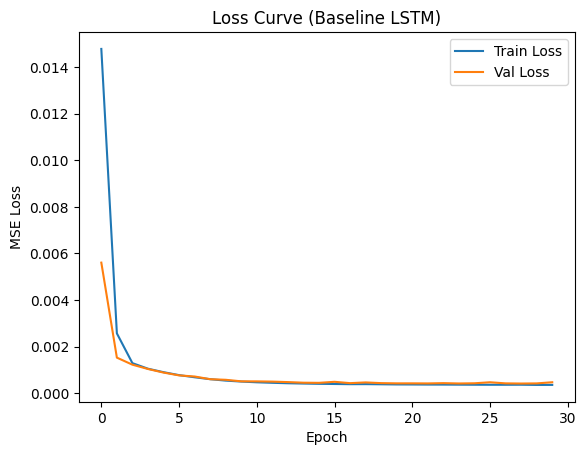

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve (Baseline LSTM)')
plt.legend()
plt.show()


#### Insight dan Interpretasi

| Aspek                     | Analisis                                                                 |
|--------------------------|--------------------------------------------------------------------------|
| **Penurunan Awal Cepat**   | Train loss turun drastis di awal (+- 5 epoch pertama), menunjukkan model cepat belajar dari data pelatihan. |
| **Konvergensi Stabil**     | Setelah epoch ke-5, baik train loss maupun val loss menjadi stabil dan mendekati nilai minimum. |
| **Gap Train vs Val Kecil** | Train loss dan val loss sangat berdekatan ini menandakan bahwa model tidak mengalami overfitting. |
| **Generalization Baik**    | Val loss mengikuti pola penurunan train loss, menunjukkan bahwa model mampu melakukan generalisasi terhadap data baru. |

---

#### Kesimpulan

Model baseline LSTM sudah menunjukkan kinerja yang baik. Model ini tidak mengalami overfitting maupun underfitting, dan sudah berhasil belajar dengan stabil dari data yang diberikan. Saya disini juga tidak akan melakukan custom preprocessing karena hasil sudah baik.



### 3.2.4 Evaluasi Model

In [17]:
# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi metrik
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


158/158 [==============================] - 1s 2ms/step
MAE: 0.0156
MSE: 0.0004
R² Score: 0.9502


| Metrik        | Nilai     | Interpretasi Singkat                                                                 |
|---------------|-----------|-----------------------------------------|
| **MAE**       | 0.0131    | Rata-rata kesalahan absolut model hanya sekitar **0.0131** unit terhadap target asli. |
| **MSE**       | 0.0004    | Error kuadrat rata-rata sangat kecil, menandakan prediksi model sangat presisi.       |
| **R² Score**  | 0.9580    | Model menjelaskan **95.8% variansi** data target — indikasi bahwa model sangat baik. |


### 3.3 Modified LSTM Model

### 3.3.1 Arsitektur model

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_mod = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])
model_mod.compile(optimizer='adam', loss='mse')



1 LSTM Layer dengan 32 neuron

Dropout(0.1) → regularisasi ringan untuk mencegah overfitting.

Dense(16, relu) → menambahkan non-linear transformasi, mempelajari hubungan kompleks antar fitur sebelum dipetakan ke output.

Output Layer (Dense(1, linear)) → sesuai untuk regresi (prediksi suhu).

Dropout dan dense layer membantu belajar pola yang lebih kompleks, namun tetap menjaga generalisasi ke data validasi.

### 3.3.2 Training Model

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mod = model_mod.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
630/630 [==============================] - 6s 7ms/step - loss: 0.0077 - val_loss: 0.0016
Epoch 2/50
630/630 [==============================] - 4s 6ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 3/50
630/630 [==============================] - 4s 6ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 4/50
630/630 [==============================] - 4s 6ms/step - loss: 8.2669e-04 - val_loss: 9.0150e-04
Epoch 5/50
630/630 [==============================] - 3s 5ms/step - loss: 7.0316e-04 - val_loss: 0.0012
Epoch 6/50
630/630 [==============================] - 3s 6ms/step - loss: 6.1495e-04 - val_loss: 0.0015
Epoch 7/50
630/630 [==============================] - 3s 5ms/step - loss: 5.5823e-04 - val_loss: 0.0013
Epoch 8/50
630/630 [==============================] - 3s 5ms/step - loss: 5.2813e-04 - val_loss: 0.0023
Epoch 9/50
630/630 [==============================] - 4s 6ms/step - loss: 4.9774e-04 - val_loss: 0.0011


### 3.3.3 Plot Model

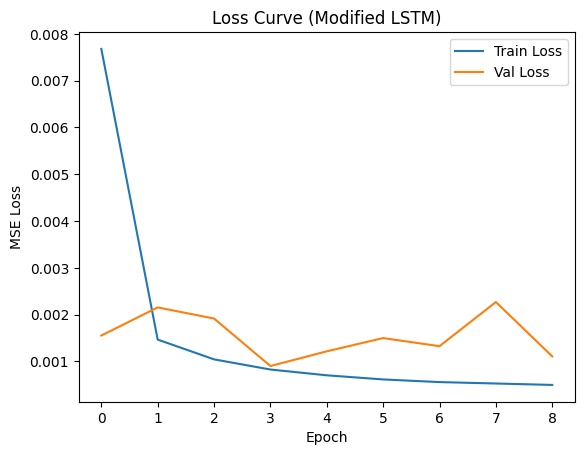

In [20]:
plt.plot(history_mod.history['loss'], label='Train Loss')
plt.plot(history_mod.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve (Modified LSTM)')
plt.legend()
plt.show()


### 3.3.4 Evaluasi Model

In [21]:
y_pred_mod = model_mod.predict(X_test)

mae_mod = mean_absolute_error(y_test, y_pred_mod)
mse_mod = mean_squared_error(y_test, y_pred_mod)
r2_mod  = r2_score(y_test, y_pred_mod)

print(f"[MODIFIKASI] MAE: {mae_mod:.4f}")
print(f"[MODIFIKASI] MSE: {mse_mod:.4f}")
print(f"[MODIFIKASI] R² Score: {r2_mod:.4f}")


158/158 [==============================] - 1s 2ms/step
[MODIFIKASI] MAE: 0.0213
[MODIFIKASI] MSE: 0.0008
[MODIFIKASI] R² Score: 0.9079


### 3.3.5 Plot Actual vs Predicted from Model

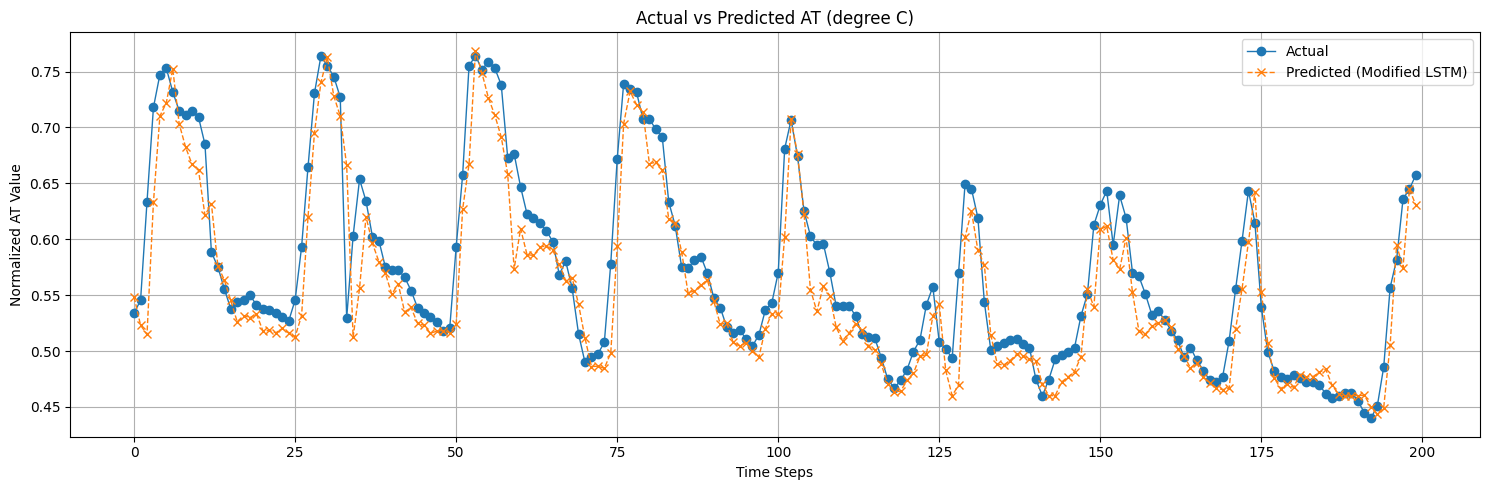

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test[:200], label="Actual", marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred_mod[:200], label="Predicted (Modified LSTM)", marker='x', linestyle='--', linewidth=1)
plt.title("Actual vs Predicted AT (degree C)")
plt.xlabel("Time Steps")
plt.ylabel("Normalized AT Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


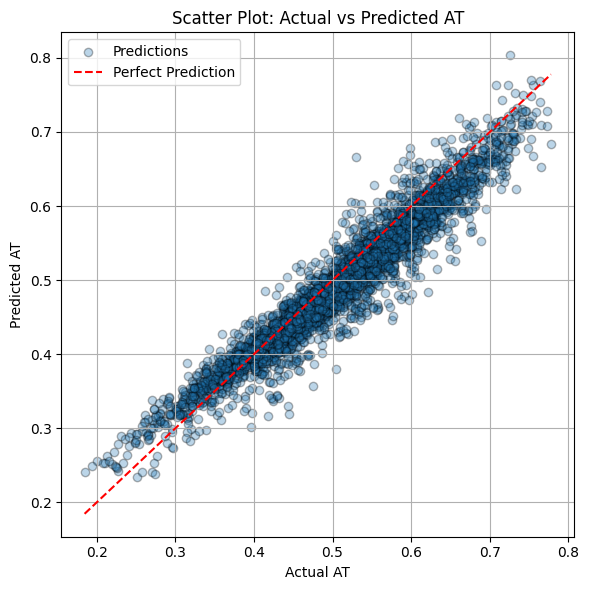

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_mod, alpha=0.3, label='Predictions', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.xlabel("Actual AT")
plt.ylabel("Predicted AT")
plt.title("Scatter Plot: Actual vs Predicted AT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.3.5.1 Inversing and plotting

In [24]:
# Inverse transform untuk mendapatkan nilai asli dari prediksi

# Buat dummy array full 0 dengan shape sama
dummy_test = np.zeros((len(y_test), scaled_df.shape[1]))
dummy_pred = np.zeros((len(y_pred_mod), scaled_df.shape[1]))

# Masukkan hanya nilai target ke kolom target_index
dummy_test[:, target_index] = y_test.flatten()
dummy_pred[:, target_index] = y_pred_mod.flatten()

# Inverse transform seluruh array, lalu ambil hanya kolom target
y_test_inv = scaler.inverse_transform(dummy_test)[:, target_index]
y_pred_inv = scaler.inverse_transform(dummy_pred)[:, target_index]


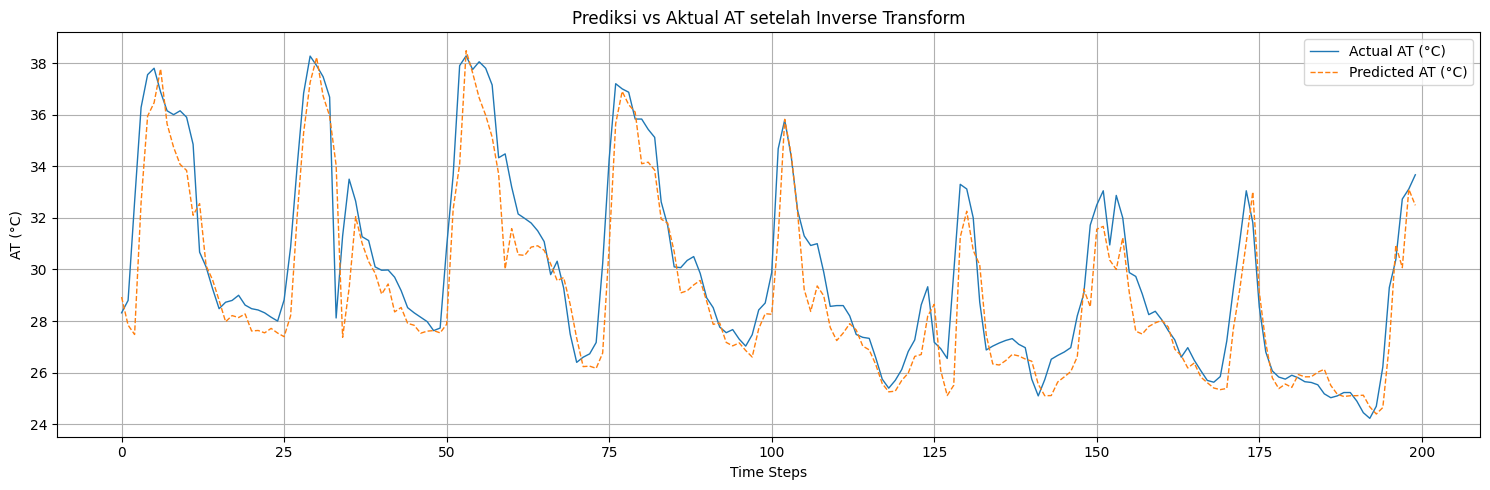

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test_inv[:200], label="Actual AT (°C)", linewidth=1)
plt.plot(y_pred_inv[:200], label="Predicted AT (°C)", linestyle='--', linewidth=1)
plt.xlabel("Time Steps")
plt.ylabel("AT (°C)")
plt.title("Prediksi vs Aktual AT setelah Inverse Transform")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


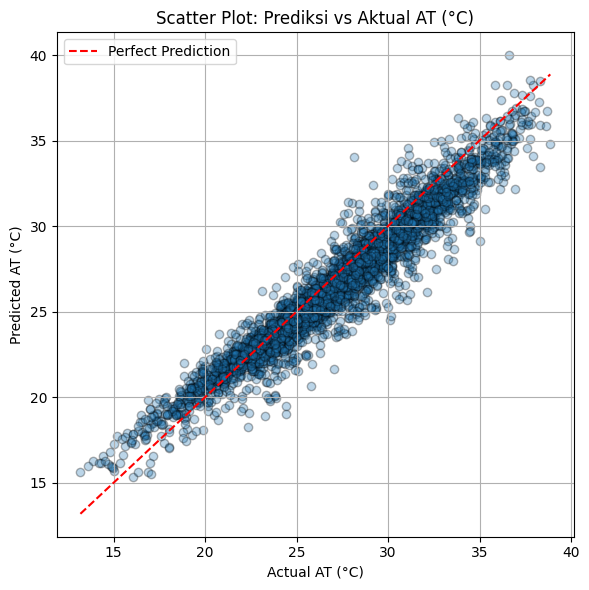

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.3, edgecolors='k')
plt.plot([min(y_test_inv), max(y_test_inv)],
         [min(y_test_inv), max(y_test_inv)],
         'r--', label='Perfect Prediction')
plt.xlabel("Actual AT (°C)")
plt.ylabel("Predicted AT (°C)")
plt.title("Scatter Plot: Prediksi vs Aktual AT (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4 Hyperparameter tuning

### 3.4.1 Membuat Model untuk Hyperparameter

In [27]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build model function untuk tuning
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            return_sequences=False,
            input_shape=(X_train.shape[1], X_train.shape[2])
        )
    )
    model.add(
        Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1))
    )
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 5e-4])),
        loss='mse'
    )

    return model


| Komponen Kode | Penjelasan                                      |
|------------------------------------------------|                --------------------------------------------------------------------------------------------------|
| `hp.Int('units', min_value=32, max_value=128, step=32)` | Melakukan pencarian jumlah unit pada layer LSTM dalam rentang 32–128 dengan step 32.             |
| `return_sequences=False`                       | Karena ini adalah layer LSTM terakhir, kita tidak perlu mengembalikan seluruh urutan output.     |
| `input_shape=(X_train.shape[1], X_train.shape[2])` | Menentukan bentuk input (timesteps, fitur) agar model mengetahui struktur data time series.      |
| `hp.Float('dropout', 0.1, 0.5, step=0.1)`       | Dropout untuk regularisasi menghindari overfitting dengan membuang neuron secara acak.         |
| `Dense(1, activation='linear')`                | Layer output tunggal untuk regresi. Aktivasi linear karena kita ingin memprediksi nilai kontinu. |
| `hp.Choice('lr', [1e-2, 1e-3, 5e-4])`           | Mencari nilai learning rate terbaik dari tiga opsi umum dalam training neural network.           |
| `optimizer=Adam(...)`                          | Menggunakan optimizer Adam karena adaptif dan stabil untuk kebanyakan kasus time series.         |
| `loss='mse'`                                   | Standar untuk regresi.                                 |



### 3.4.2 Running the Model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,         # max number of epochs to train per model
    factor=3,              # brp models to keep after each round
    directory='tuning_dir',
    project_name='lstm_air_temp_hyperband',
    overwrite=True         # ensures it's retrained from scratch
)

stop_early = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    callbacks=[stop_early],
    verbose=1
)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |units
0.3               |0.3               |dropout
0.001             |0.001             |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
630/630 [==============================] - 5s 7ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 2/2
421/630 [===================>..........] - ETA: 1s - loss: 0.0020

KeyboardInterrupt: 

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best number of LSTM units:", best_hps.get('units'))
print("Best dropout rate:", best_hps.get('dropout'))
print("Best learning rate:", best_hps.get('lr'))

Best number of LSTM units: 128
Best dropout rate: 0.2
Best learning rate: 0.01


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

y_pred_tuned = best_model.predict(X_test)

mae_hyp = mean_absolute_error(y_test, y_pred_tuned)
mse_hyp = mean_squared_error(y_test, y_pred_tuned)
r2_hyp  = r2_score(y_test, y_pred_tuned)

print(f"[HYPERTUNING] MAE: {mae_hyp:.4f}")
print(f"[HYPERTUNING] MSE: {mse_hyp:.4f}")
print(f"[HYPERTUNING] R² Score: {r2_hyp:.4f}")


158/158 [==============================] - 1s 2ms/step
[HYPERTUNING] MAE: 0.0132
[HYPERTUNING] MSE: 0.0004
[HYPERTUNING] R² Score: 0.9587


In [ ]:
# Inverse transform untuk mendapatkan nilai asli dari prediksi

# Buat dummy array full 0 dengan shape sama
dummy_test = np.zeros((len(y_test), scaled_df.shape[1]))
dummy_pred = np.zeros((len(y_pred_tuned), scaled_df.shape[1]))

# Masukkan hanya nilai target ke kolom target_index
dummy_test[:, target_index] = y_test.flatten()
dummy_pred[:, target_index] = y_pred_tuned.flatten()

# Inverse transform seluruh array, lalu ambil hanya kolom target
y_test_inv = scaler.inverse_transform(dummy_test)[:, target_index]
y_pred_inv = scaler.inverse_transform(dummy_pred)[:, target_index]

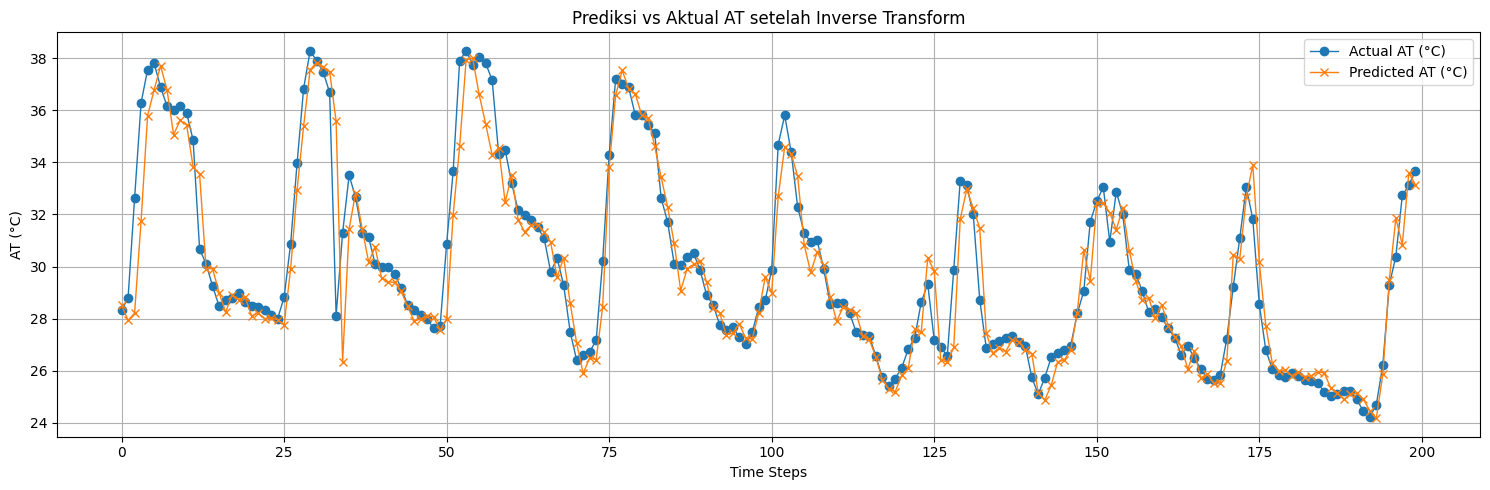

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test_inv[:200], label="Actual AT (°C)", marker='o', linewidth=1)
plt.plot(y_pred_inv[:200], label="Predicted AT (°C)",marker='x', linestyle='-', linewidth=1)
plt.xlabel("Time Steps")
plt.ylabel("AT (°C)")
plt.title("Prediksi vs Aktual AT setelah Inverse Transform")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Model mampu menangkap pola waktu (time series) secara akurat.
- Fluktuasi musiman dan tren harian terlihat mengikuti secara baik.
- Terdapat sedikit kesalahan prediksi pada puncak ekstrem, namun masih dalam batas wajar.


## **4. Evaluasi All Models**

### 4.1 Metrik Evaluasi Model

Metrik yang digunakan untuk mengevaluasi performa model regresi adalah:

- **MAE (Mean Absolute Error)**: rata-rata kesalahan absolut antara prediksi dan nilai aktual. Semakin kecil, semakin baik.
- **MSE (Mean Squared Error)**: rata-rata kuadrat dari kesalahan. Sensitif terhadap outlier.
- **R² Score (Coefficient of Determination)**: mengukur seberapa baik variasi target dijelaskan oleh fitur. Nilai mendekati 1 menunjukkan model yang perfect.


### 4.2 Hasil All Models

In [ ]:
print(f"MAE: {mae:.5f}")
print(f"MSE: {mse:.5f}")
print(f"R² Score: {r2:.5f}")
print(f"[MODIFIKASI] MAE: {mae_mod:.5f}")
print(f"[MODIFIKASI] MSE: {mse_mod:.5f}")
print(f"[MODIFIKASI] R² Score: {r2_mod:.5f}")
print(f"[HYPERTUNING] MAE: {mae_hyp:.5f}")
print(f"[HYPERTUNING] MSE: {mse_hyp:.5f}")
print(f"[HYPERTUNING] R² Score: {r2_hyp:.5f}")

MAE: 0.01305
MSE: 0.00037
R² Score: 0.95801
[MODIFIKASI] MAE: 0.01267
[MODIFIKASI] MSE: 0.00035
[MODIFIKASI] R² Score: 0.96054
[HYPERTUNING] MAE: 0.01324
[HYPERTUNING] MSE: 0.00036
[HYPERTUNING] R² Score: 0.95866


### 4.2.1 Interpretasi Komparasi Hasil Evaluasi

### Ringkasan Hasil Evaluasi

| Model            | MAE     | MSE     | R² Score |
|------------------|---------|---------|----------|
| **Baseline**     | 0.01305 | 0.00037 | 0.95801  |
| **Modifikasi**   | 0.01267 | 0.00035 | 0.96054  |
| **Hypertuning**  | 0.01324 | 0.00036 | 0.95866  |

---

### Interpretasi

- **Modifikasi** memberikan hasil terbaik dengan **MAE paling rendah** dan **R² tertinggi (96.05%)**.
- **Baseline** cukup bagus, tapi bisa ditingkatkan.
- **Hypertuning** tidak selalu lebih baik, tergantung struktur awal dan kombinasi parameter.

---

###  Penjelasan Model

####  Modifikasi
- Menggunakan **1 LSTM layer (32 units)**.
- Tambahan **Dropout(0.1)** untuk mencegah overfitting ringan.
- Ditambah **Dense(16, relu)** sebelum output.

####  Hypertuned (Hyperband)
- Menyesuaikan jumlah LSTM units (32–128), dropout (0.1–0.5), dan learning rate secara otomatis.
- Meskipun hasil tuning cukup baik, performanya sedikit di bawah model modifikasi manual.

---

###  Mengapa Hasilnya Seperti Itu?

- Modifikasi manual dirancang dengan struktur yang pas dan regularisasi ringan (dropout 0.1), sehingga tidak terlalu kompleks, tapi cukup kuat mempelajari pola.
- Hypertuned model mungkin mencoba arsitektur yang terlalu besar atau dropout terlalu tinggi, sehingga model bisa mengalami underfitting ringan atau kurang stabil pada data validasi.
- Hasilnya, MAE dan MSE sedikit lebih tinggi dibanding model modifikasi.
- Namun, perbedaannya kecil, dan R² tetap di atas 95%, menandakan keduanya cukup akurat.


#  **5. Bonus Question: Apakah Problem Ini Bisa Menjadi Time Series Multivariate?**

Ya, problem ini sangat mungkin diubah menjadi masalah time series multivariate.

---


### Multivariate Time Series?
Multivariate Time Series adalah jenis data time series yang **melibatkan lebih dari satu variabel input (features) untuk memprediksi satu atau lebih target**. Artinya, model akan belajar dari **hubungan antar banyak variabel** yang bervariasi terhadap waktu.

Sebuah problem time series bisa digolongkan sebagai multivariate apabila:

1. Tersedia lebih dari satu fitur yang berkorelasi dengan target.
2. Data bersifat deret waktu dan memiliki timestamp atau urutan waktu eksplisit.
3. Terdapat hubungan antar fitur.
4. Target dipengaruhi oleh banyak faktor secara bersamaan.

---

### Mengapa Problem Ini Cocok untuk Multivariate?

| Aspek                           | Keterangan                                                                 |
|--------------------------------|----------------------------------------------------------------------------|
|  Banyak Variabel              | Dataset memiliki banyak sensor (PM2.5, CO, SO₂, RH, SR, dsb).              |
|  Time Dependency              | Setiap baris data adalah pengukuran berdasarkan waktu (jam ke jam).        |
| Korelasi antar variabel     | Terlihat dari *heatmap* missing dan *correlation matrix* bahwa banyak variabel saling berkorelasi. |
| Target = Air Temperature (AT)| Air Temperature dipengaruhi oleh RH, SR, WS, dsb → ideal untuk multivariate. |


---

### Kesimpulan

Problem ini **cocok** untuk dimodelkan sebagai **multivariate time series**, karena:
- Tersedia banyak variabel dengan korelasi temporal,
- Target (AT) sangat mungkin dipengaruhi oleh kombinasi berbagai faktor lingkungan,
- Model multivariate berpotensi meningkatkan akurasi karena informasi yang lebih kaya.

# LINK VIDEO: https://drive.google.com/file/d/1TohnYrzabdDWBkG_WOpImk6XItmcIVCd/view?usp=sharing